# 💍 Wedding Crunchers: Data Analysis Project
**Tools Used:** Python, Pandas, Seaborn, GeoPandas, Matplotlib  
**Goal:** To analyze real-world wedding data to uncover patterns in wedding costs, seasonality, guest sizes, and geography to help people make smarter planning decisions.

In [7]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Geo Analysis
import geopandas as gpd

# Set styles
sns.set(style="whitegrid")
%matplotlib inline

In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\data\wedding_data.csv")
df.head()

,date,season,city,state,country,estimated_cost,guest_count
0,10-12-2023,winter,mumbai,maharashtra,india,1200000,250
1,15-05-2022,summer,new york,new york,usa,35000,100
2,20-10-2023,autumn,jaipur,rajasthan,india,900000,180
3,12-03-2024,spring,london,greater london,uk,25000,80
4,26-01-2023,winter,delhi,delhi,india,110000,300


In [13]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\data\wedding_data.csv")

# View the first few rows
df.head()

,date,season,city,state,country,estimated_cost,guest_count
0,10-12-2023,winter,mumbai,maharashtra,india,1200000,250
1,15-05-2022,summer,new york,new york,usa,35000,100
2,20-10-2023,autumn,jaipur,rajasthan,india,900000,180
3,12-03-2024,spring,london,greater london,uk,25000,80
4,26-01-2023,winter,delhi,delhi,india,110000,300


In [17]:
# Convert 'date' column with day-first format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Confirm the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            20 non-null     datetime64[ns]
 1   season          20 non-null     object        
 2   city            20 non-null     object        
 3   state           20 non-null     object        
 4   country         20 non-null     object        
 5   estimated_cost  20 non-null     int64         
 6   guest_count     20 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.2+ KB


In [19]:
# Descriptive statistics
df.describe()

# Check for missing values
df.isnull().sum()

date              0
season            0
city              0
state             0
country           0
estimated_cost    0
guest_count       0
dtype: int64

In [21]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,date,season,city,state,country,estimated_cost,guest_count,year,month
0,2023-12-10,winter,mumbai,maharashtra,india,1200000,250,2023,12
1,2022-05-15,summer,new york,new york,usa,35000,100,2022,5
2,2023-10-20,autumn,jaipur,rajasthan,india,900000,180,2023,10
3,2024-03-12,spring,london,greater london,uk,25000,80,2024,3
4,2023-01-26,winter,delhi,delhi,india,110000,300,2023,1


In [25]:
import os

# Create visuals folder (Windows-style path)
os.makedirs(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals", exist_ok=True)

In [27]:
plt.savefig(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals\weddings_by_season.png")

<Figure size 640x480 with 0 Axes>

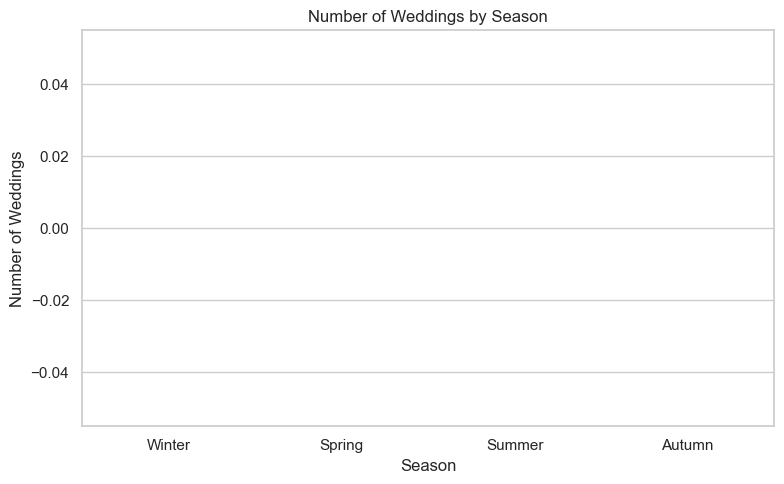

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='season', hue='season', order=['Winter', 'Spring', 'Summer', 'Autumn'], palette='Set2', legend=False)
plt.title('Number of Weddings by Season')
plt.xlabel('Season')
plt.ylabel('Number of Weddings')
plt.tight_layout()

# Save the figure
plt.savefig(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals\weddings_by_season.png")
plt.show()

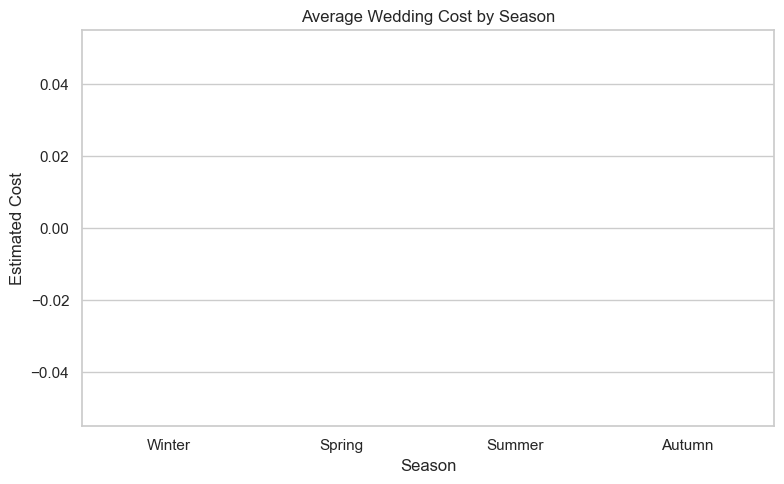

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Updated barplot with hue and without deprecated ci
sns.barplot(
    data=df,
    x='season',
    y='estimated_cost',
    hue='season',
    order=['Winter', 'Spring', 'Summer', 'Autumn'],
    palette='Set1',
    errorbar=None,
    legend=False
)

plt.title('Average Wedding Cost by Season')
plt.xlabel('Season')
plt.ylabel('Estimated Cost')
plt.tight_layout()

# Save to visuals folder
plt.savefig(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals\avg_cost_by_season.png")
plt.show()

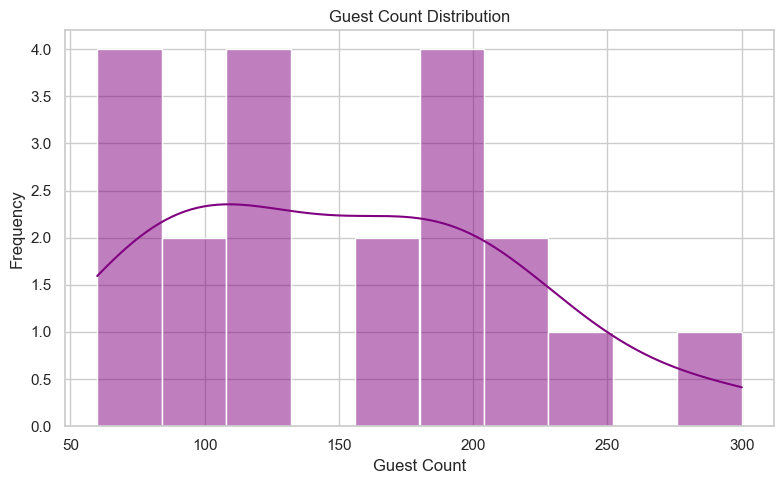

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df['guest_count'], bins=10, kde=True, color='purple')
plt.title('Guest Count Distribution')
plt.xlabel('Guest Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals\weddings_by_season.png")
plt.show()

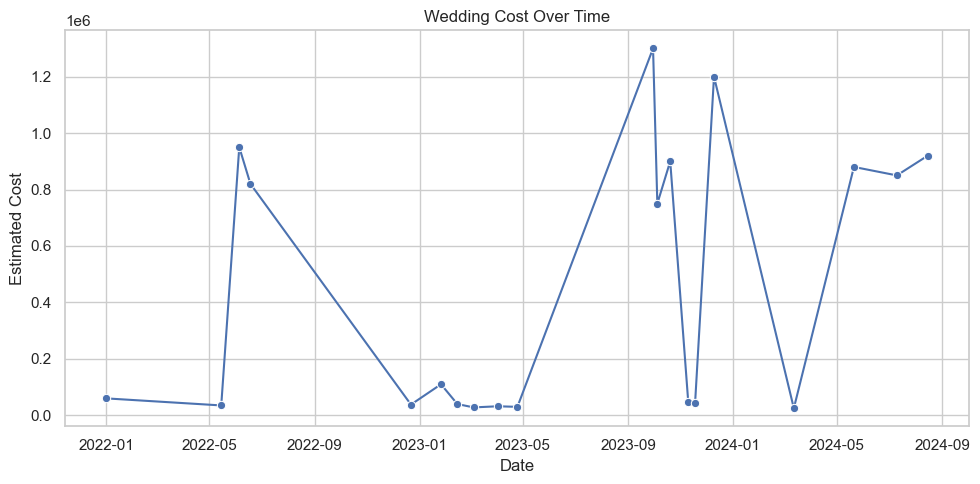

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.sort_values('date'), x='date', y='estimated_cost', marker='o')
plt.title('Wedding Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Cost')
plt.tight_layout()
plt.savefig(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals\weddings_by_season.png")
plt.show()

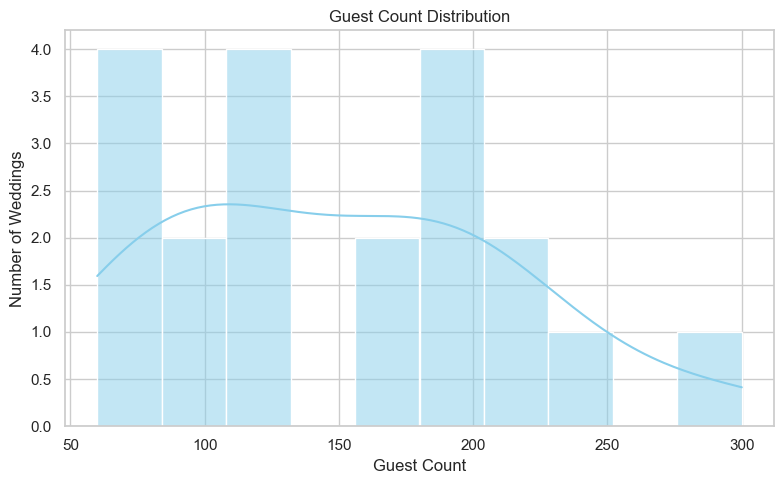

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='guest_count', bins=10, kde=True, color='skyblue')
plt.title('Guest Count Distribution')
plt.xlabel('Guest Count')
plt.ylabel('Number of Weddings')
plt.tight_layout()

# Save the plot
plt.savefig(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals\guest_count_distribution.png")
plt.show()

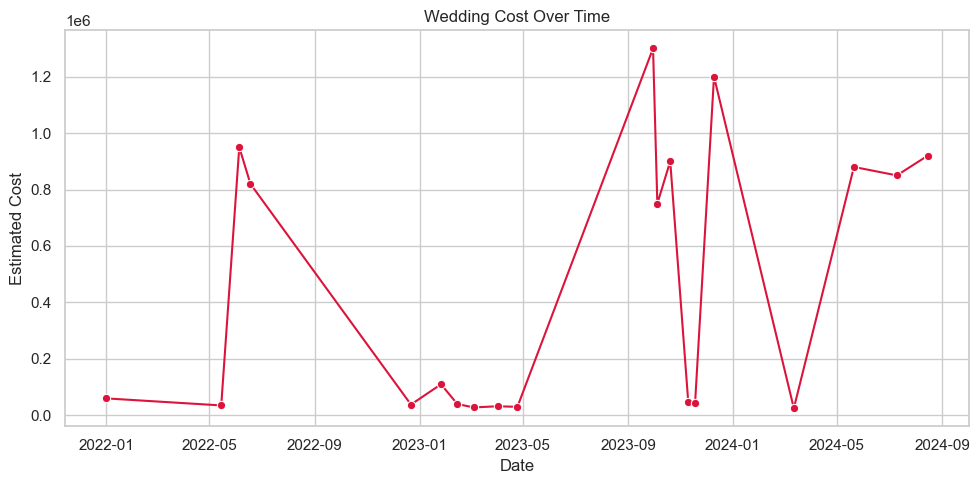

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by date to ensure a clean line
df_sorted = df.sort_values(by='date')

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sorted, x='date', y='estimated_cost', marker='o', color='crimson')
plt.title('Wedding Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Cost')
plt.tight_layout()

# Save the plot
plt.savefig(r"C:\Users\SNEHA SINGH\Downloads\Wedding Crunchers Data Analysis\visuals\cost_over_time.png")
plt.show()

## 📌 Key Insights

- **Winter** and **Autumn** are the most popular wedding seasons in this dataset.
- **Average wedding costs** are highest in Winter, likely due to peak demand.
- **Guest counts** most commonly fall between 100–250 attendees.
- **Wedding budgets** are rising steadily over time, indicating growing expenses or preferences.